**Reading the csv file storing the celebrity data**

In [2]:
import numpy as np
import pandas as pd
payment=pd.read_csv("C:\\Users\\Anales\\Documents\\celebrity_deaths_2016.csv")

In [3]:
payment.head(20)

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
0,85,1931,natural causes,January,2006,American businessman chairman of IBM (1973–1981),Frank Cary,American
1,49,1967,murdered,January,2006,American musician (House of Freaks Gutterball),Bryan Harvey,American
2,64,1952,Alzheimer's disease,January,2006,American baseball player (Oakland Athletics),Paul Lindblad,American
3,86,1930,Alzheimer's disease,January,2006,American politician Representative from Oregon...,Charles O. Porter,American
4,82,1934,cancer,January,2006,Cuban nightclub owner (Tropicana Club),Ofelia Fox,Cuban
5,52,1964,stroke,January,2006,Papua New Guinean politician Prime Minister (1...,Sir William Skate,Papua
6,31,1985,probably pulmonary embolism,January,2006,Hungarian footballer (soccer player),Gábor Zavadszky,Hungarian
7,31,1985,from injuries sustained in a biking accident,January,2006,Argentine football (soccer) player,José Luis Sánchez,Argentine
8,55,1961,NaN,January,2006,Canadian inventor (KISS rebreather),Gordon Smith,Canadian
9,70,1946,lung cancer,January,2006,American actor (The Guiding Light),Don Stewart,American


**Cleaning the data:** I have dropped the rows with NaN which I didn't think would be useful anyways.

In [4]:
#nationyr_count=payment.groupby(['death_year', 'nationality']).size()
payment_nona=payment.dropna()

**Question:** Is number of celebrity deaths increasing?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E76470>]], dtype=object)

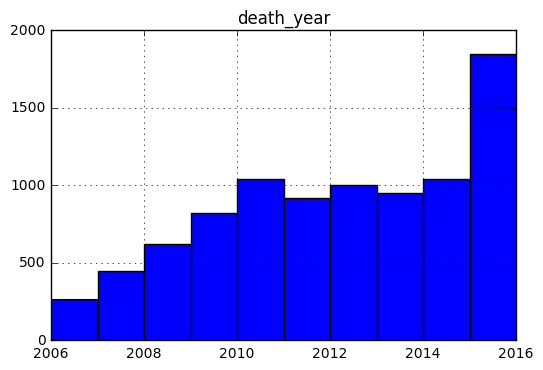

In [5]:
%matplotlib inline
payment_nona.hist(column='death_year')

***Answer:*** *Resounding Yes !*

 We are now trying to see what happens in 2016. Namely what are the primary causes of death in 2016. We will choose major two causes of death and try to analyze it based on different aspects.

In [6]:
df=payment_nona[payment_nona['death_year']==2016]

In [7]:
df1=df.cause_of_death.value_counts().reset_index().rename(columns={'index': 'cause_of_death'}, inplace=False)
df1.columns=['cause_of_death','count']



In [8]:
df2=df1[df1['count']>=10]

In [9]:
df3=pd.merge(df, df2, on=['cause_of_death'])

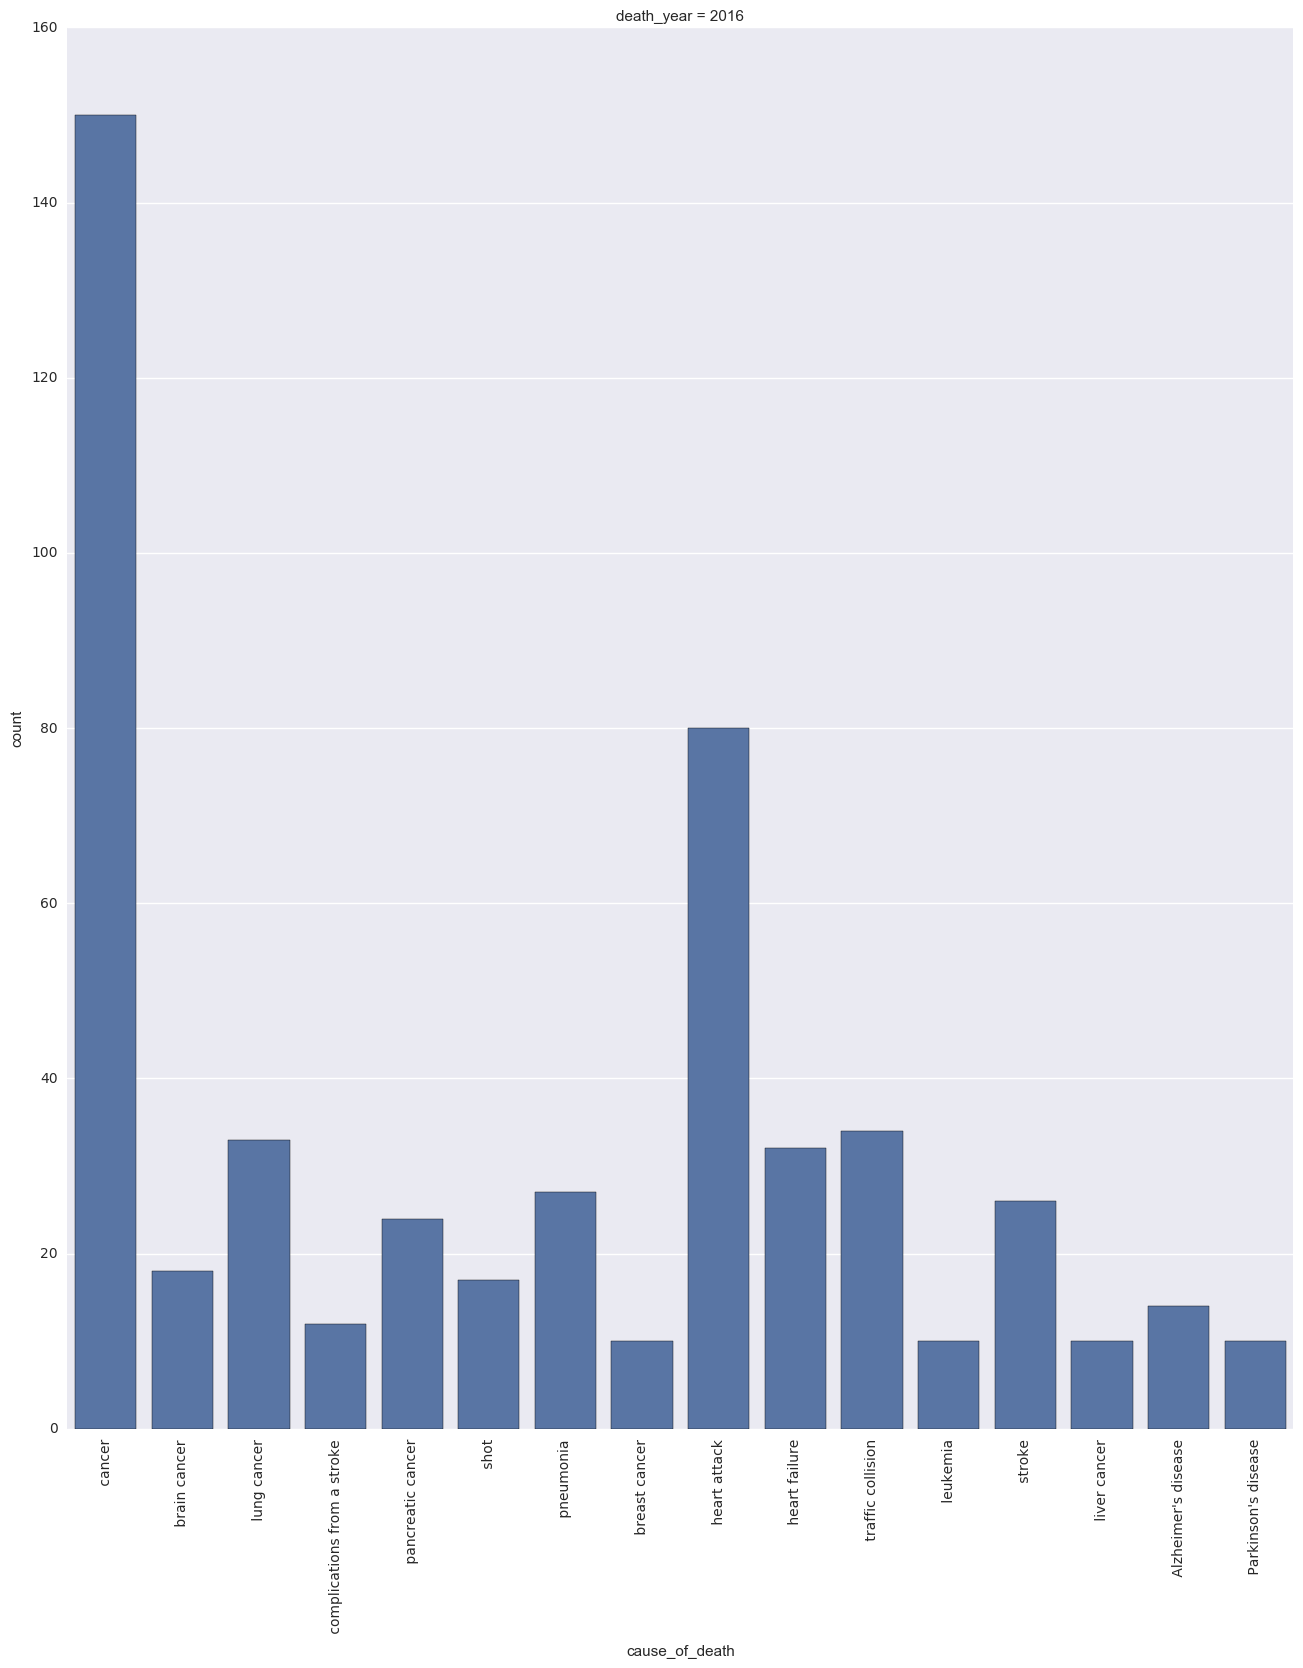

In [10]:
import seaborn as sns
g = sns.FacetGrid(df3, col="death_year",size=15, aspect=0.9)
g.map(sns.barplot,'cause_of_death','count')
g.set_xticklabels(rotation=90)

**The above plot shows that in 2016 cancer and heart attack were the major causes of death in celebrities. So we will now do our analysis on these two causes of death.**

In [11]:
payment_cancer_heart=payment_nona[(payment_nona['cause_of_death']==' cancer') | (payment_nona['cause_of_death']==' heart attack')]

In [12]:
payment_cancer_heart

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
4,82,1934,cancer,January,2006,Cuban nightclub owner (Tropicana Club),Ofelia Fox,Cuban
10,39,1977,heart attack,January,2006,German DJ prominent figure in trance music and...,Mark Spoon,German
44,93,1923,cancer,March,2006,photographer film director (Shaft),Gordon Parks,photographer
50,86,1930,cancer,March,2006,Speaker of Pennsylvania House of Representativ...,K. Leroy Irvis,Speaker
56,76,1940,heart attack,March,2006,American country music star (Hee Haw),Buck Owens,American
85,62,1954,heart attack,May,2006,Australian television journalist (60 Minutes),Richard Carleton,Australian
103,84,1932,cancer,May,2006,American tennis player winner at Wimbledon (19...,Ted Schroeder,American
128,79,1937,cancer,July,2006,President of Lebanon (1989–98),Elias Hrawi,President
147,75,1941,cancer,August,2006,German politician prime minister of Hesse (197...,Holger Börner,German
148,64,1952,cancer,August,2006,Swiss filmmaker and director (Il Bacio di Tosca),Daniel Schmid,Swiss


In [13]:
payment_ch_age_count=payment_cancer_heart.groupby(['age', 'cause_of_death']).size()

In [14]:
payment_ch_age_count

age  cause_of_death
4     heart attack      1
21    cancer            2
      heart attack      1
22    cancer            1
24    heart attack      1
25    heart attack      1
26    heart attack      4
27    heart attack      3
28    cancer            2
      heart attack      1
29    cancer            2
      heart attack      1
30    cancer            1
      heart attack      2
31    cancer            1
      heart attack      2
32    cancer            1
      heart attack      1
33    cancer            2
      heart attack      1
34    heart attack      2
35    cancer            3
      heart attack      4
36    cancer            2
      heart attack      5
37    cancer            4
      heart attack      7
38    cancer            1
      heart attack      1
39    cancer            3
                       ..
84    cancer           20
      heart attack     11
85    cancer           13
      heart attack     11
86    cancer           27
      heart attack     14
87    cancer      

In [15]:
payment_ch_age=pd.DataFrame(data=dict(payment_ch_age_count=payment_ch_age_count)).reset_index()

In [16]:
payment_ch_cancer=payment_ch_age[payment_ch_age['cause_of_death'].str.contains("cancer")]
payment_ch_heart=payment_ch_age[payment_ch_age['cause_of_death']==' heart attack']

In [17]:
payment_ch_cancer.groupby(['age','payment_ch_age_count']).size()


age  payment_ch_age_count
21   2                       1
22   1                       1
28   2                       1
29   2                       1
30   1                       1
31   1                       1
32   1                       1
33   2                       1
35   3                       1
36   2                       1
37   4                       1
38   1                       1
39   3                       1
41   5                       1
42   3                       1
43   2                       1
44   4                       1
45   2                       1
46   9                       1
47   4                       1
48   5                       1
49   11                      1
50   6                       1
51   15                      1
52   9                       1
53   16                      1
54   16                      1
55   10                      1
56   11                      1
57   15                      1
                            ..
68   42      

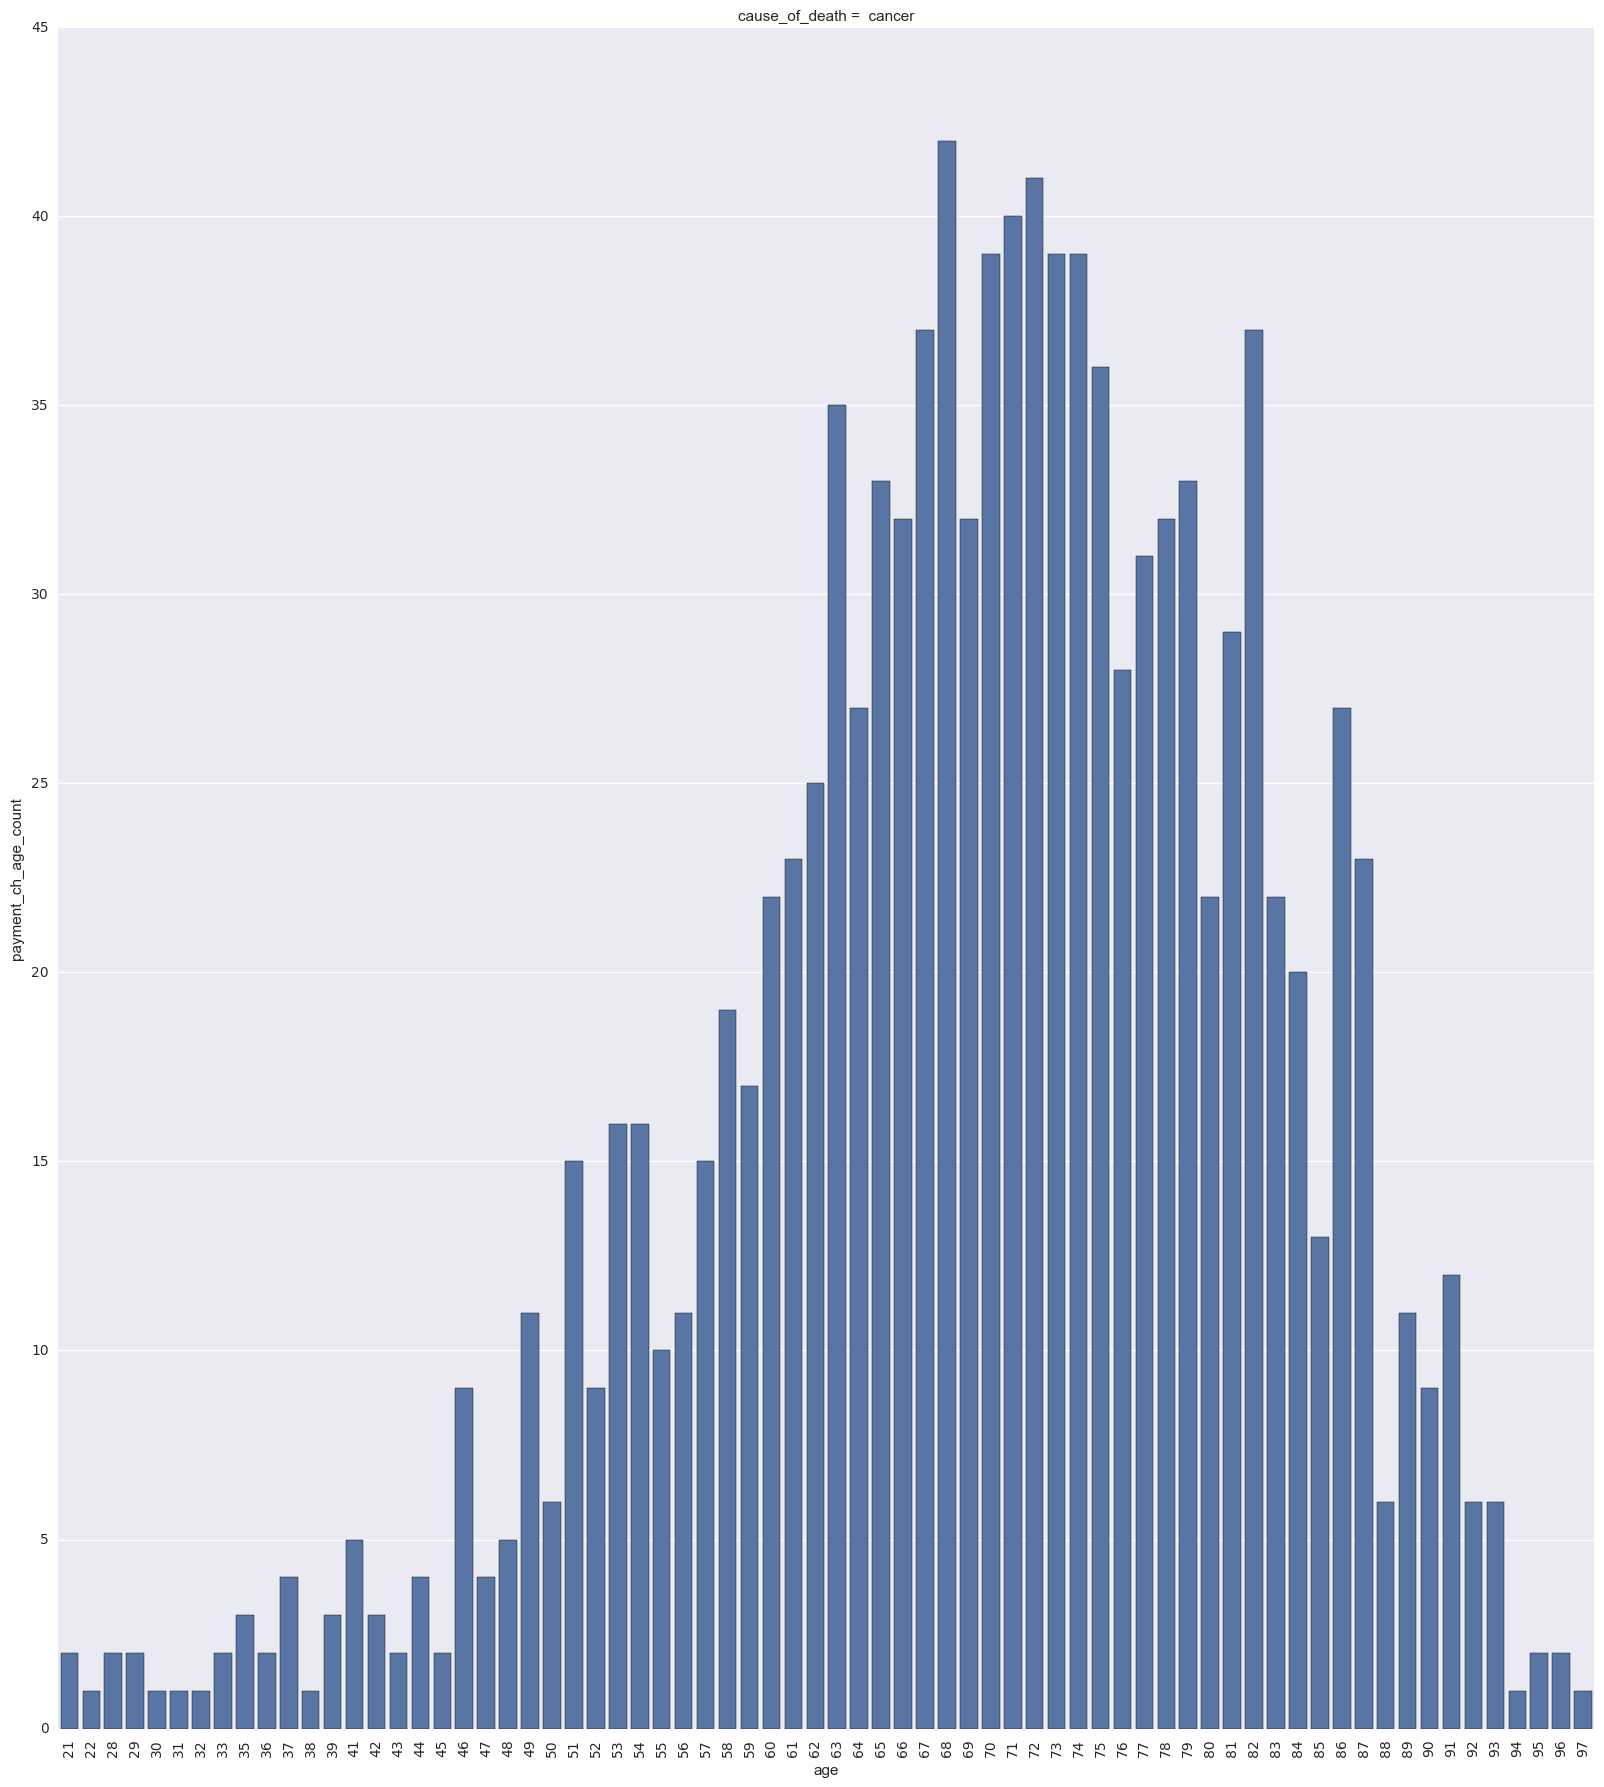

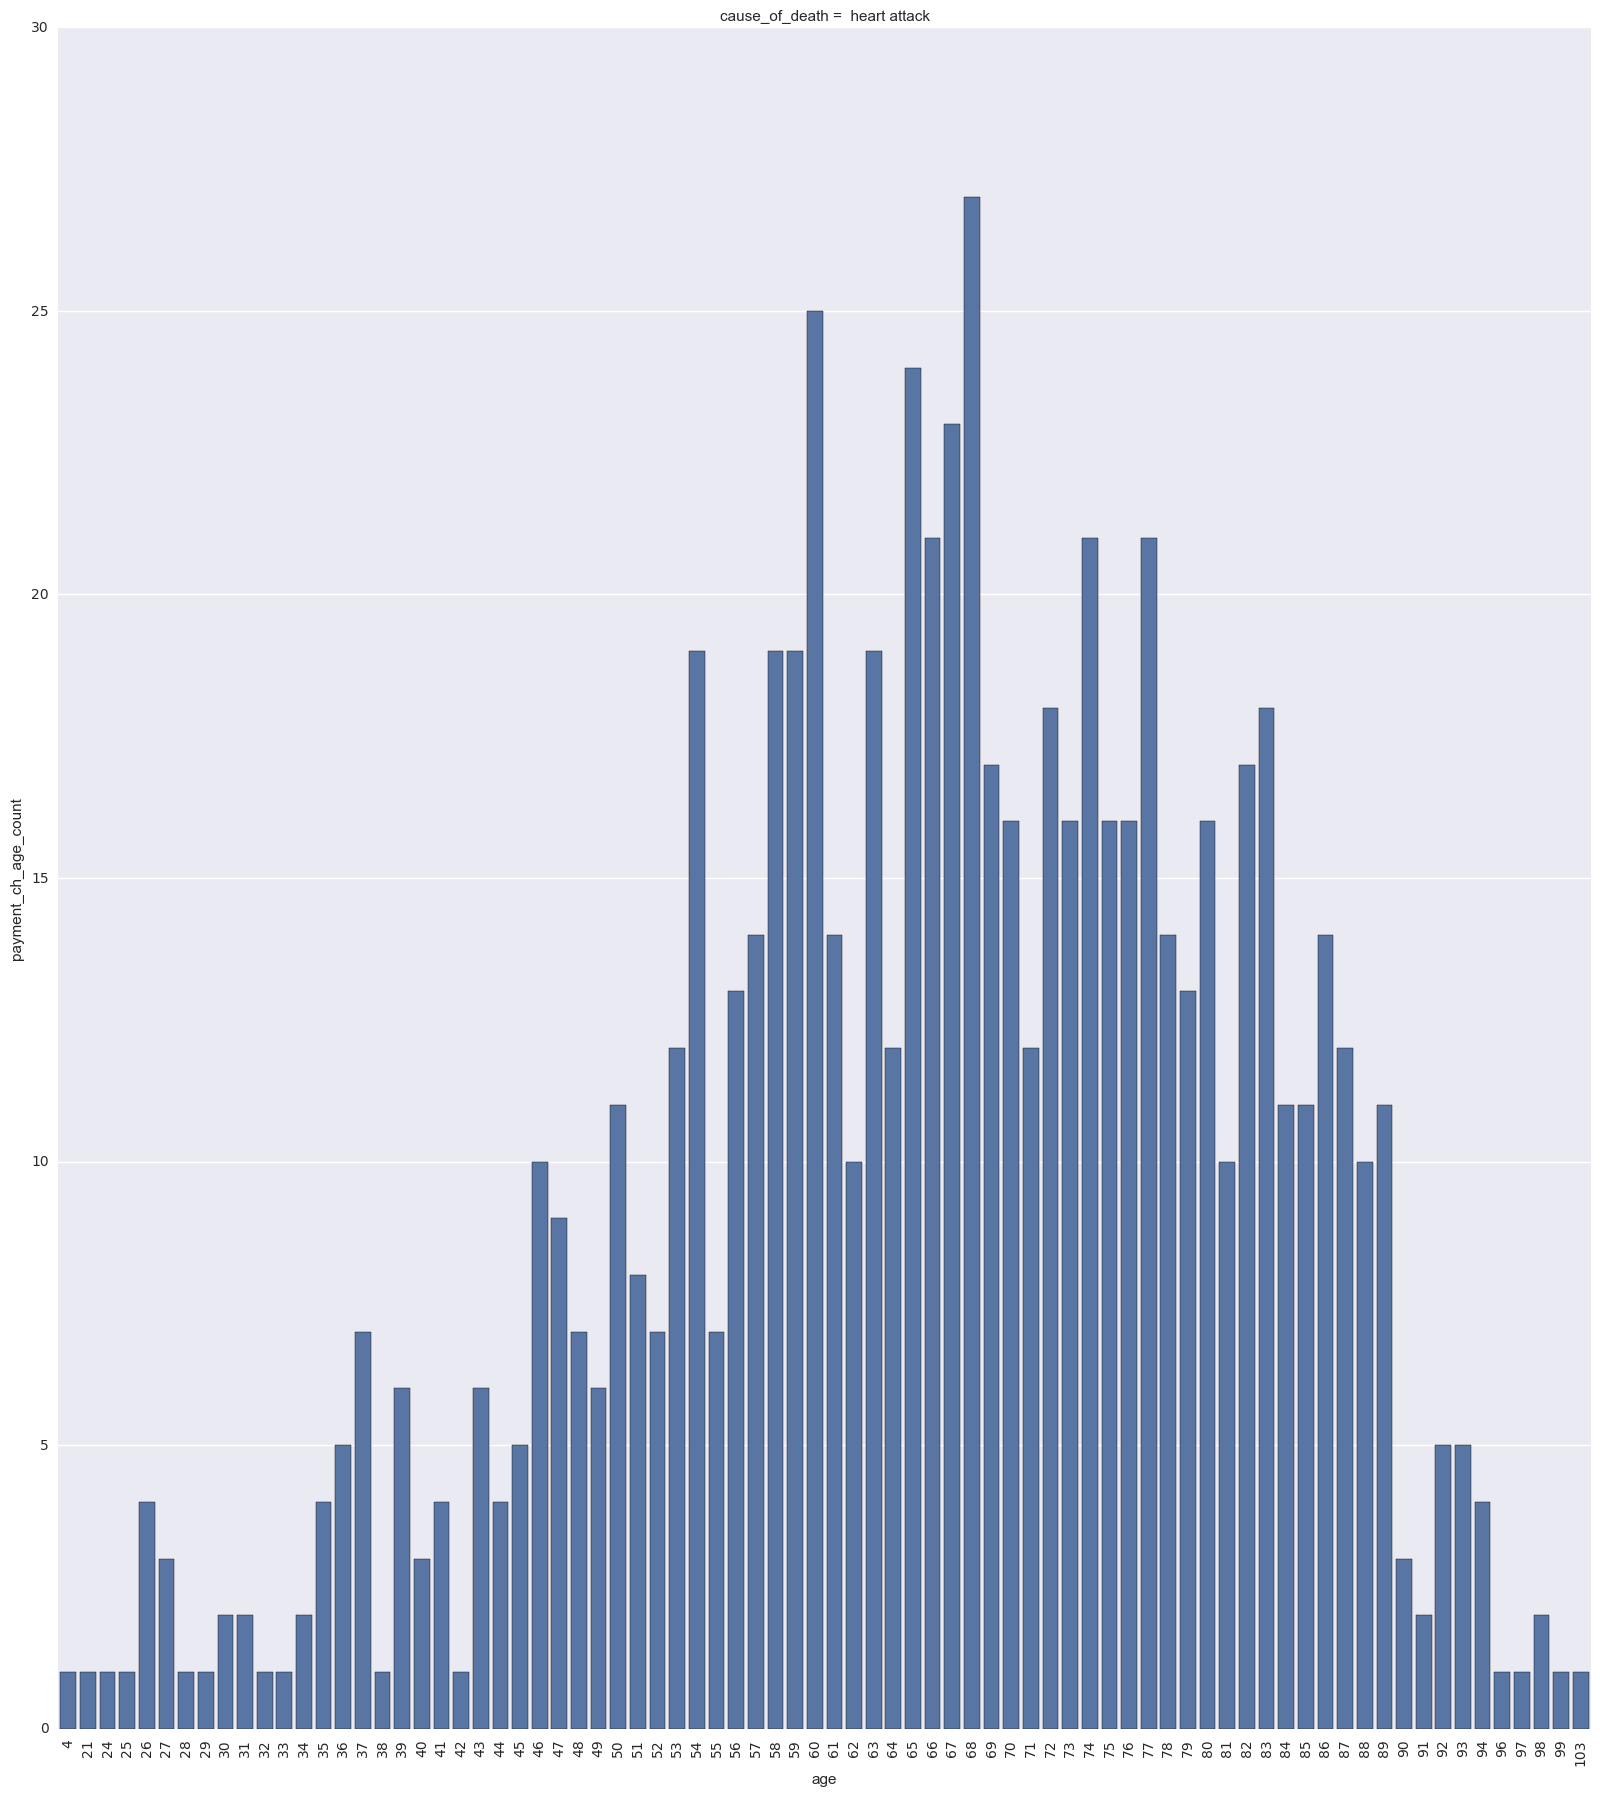

In [93]:
g = sns.FacetGrid(payment_ch_cancer, col="cause_of_death",size=18, aspect=0.9, col_wrap=1)
g.map(sns.barplot,'age','payment_ch_age_count')
g.set_xticklabels(rotation=90)
g2 = sns.FacetGrid(payment_ch_heart, col="cause_of_death",size=18, aspect=0.9, col_wrap=1)
g2.map(sns.barplot,'age','payment_ch_age_count')
g2.set_xticklabels(rotation=90)

**The above plot shows that the incidence of cancer and heart attack on celebrities is highest around the age 68.**

**Lets look at cancer more closely. We will first see the distribution of 'cancer' and 'lung cancer' and 'heart attack' for different countries. We see (from the cells below) that in America 'cancer' and 'lung cancer' are most prevalent among all cancers among celebrities. So we will explore that a little more for 2016. Next we will explore 'heart attck' which is the next biggest cause of death of celebrities in America.**

In [19]:
#count=df3.groupby(['cause_of_death', 'nationality']).size()
count=df3.groupby(['nationality','cause_of_death']).size()

In [20]:
count

nationality     cause_of_death              
Afghan           cancer                          1
American         Alzheimer's disease             5
                 Parkinson's disease             9
                 brain cancer                   15
                 breast cancer                   4
                 cancer                         60
                 complications from a stroke     8
                 heart attack                   25
                 heart failure                  14
                 leukemia                        4
                 liver cancer                    4
                 lung cancer                    17
                 pancreatic cancer              17
                 pneumonia                      15
                 shot                           11
                 stroke                         11
                 traffic collision              13
American-born    heart failure                   2
                 stroke              

In [21]:
death_nationality= pd.DataFrame(data=dict(count=count)).reset_index()

In [22]:
cancer=death_nationality[death_nationality['cause_of_death'].str.contains("cancer")]

In [23]:
cancer.columns=['nationality','cause','count']

In [24]:
cancer

,nationality,cause,count
0,Afghan,cancer,1
3,American,brain cancer,15
4,American,breast cancer,4
5,American,cancer,60
10,American,liver cancer,4
11,American,lung cancer,17
12,American,pancreatic cancer,17
20,Argentine,cancer,1
25,Australian,brain cancer,1
26,Australian,cancer,6


In [25]:
cancer2=cancer[(cancer["cause"]==' cancer') | (cancer['cause']==' lung cancer')]

In [26]:
cancer2

,nationality,cause,count
0,Afghan,cancer,1
5,American,cancer,60
11,American,lung cancer,17
20,Argentine,cancer,1
26,Australian,cancer,6
32,Belgian,cancer,1
37,British,cancer,13
42,British,lung cancer,1
51,Canadian,cancer,9
54,Canadian,lung cancer,1


In [27]:
cancer2_cancer=cancer2[cancer2['cause']==' cancer']
cancer2_lung=cancer2[cancer2['cause']==' lung cancer']

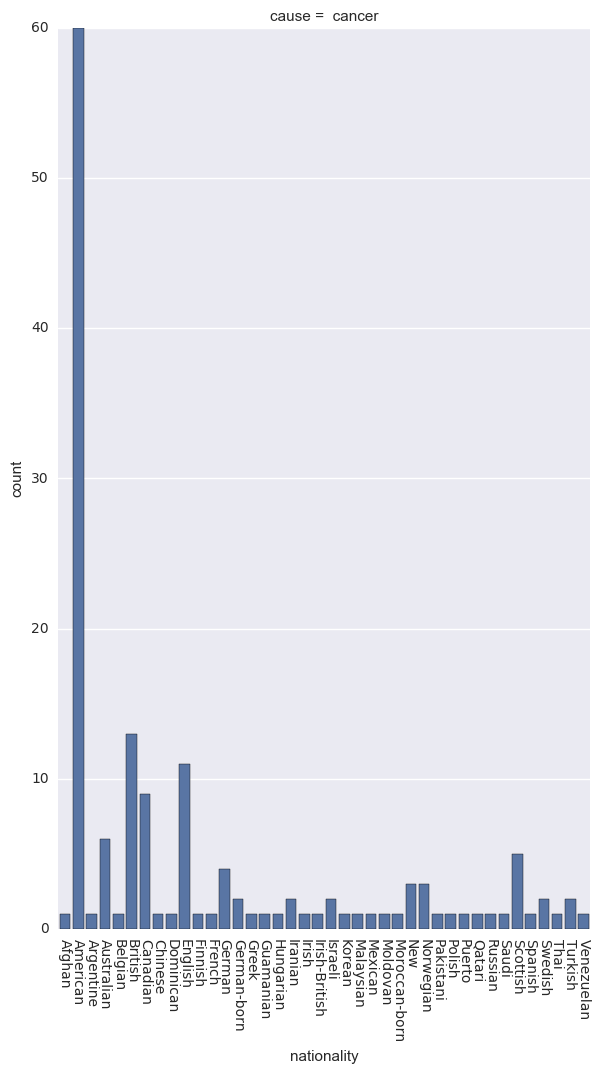

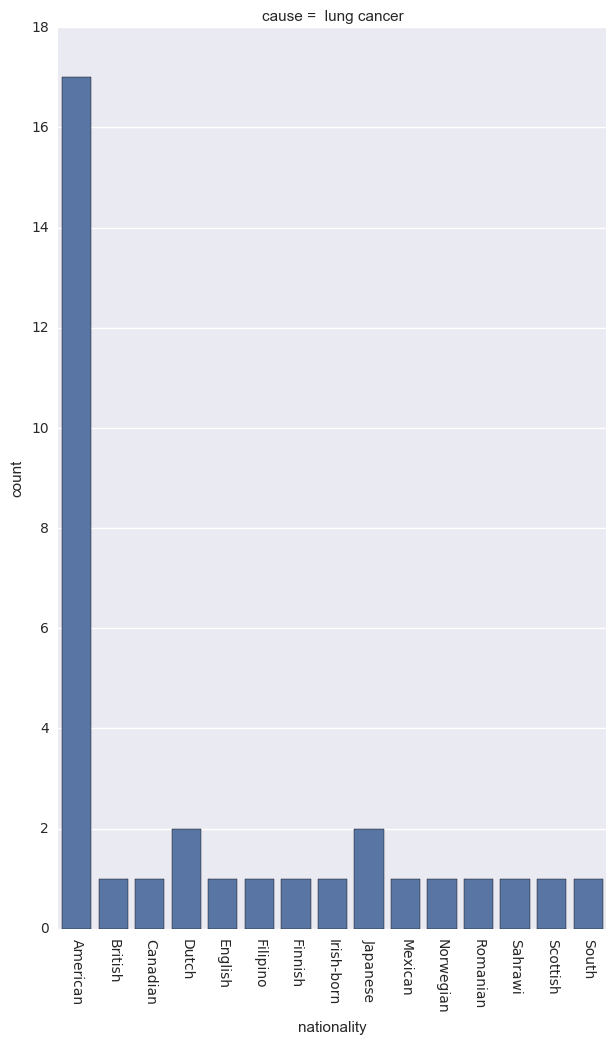

In [28]:
g = sns.FacetGrid(cancer2_cancer, col="cause", size=10, aspect=.6, col_wrap=2)
g = g.map(sns.barplot, "nationality", "count")
g.set_xticklabels(rotation=-90)
g1 = sns.FacetGrid(cancer2_lung, col="cause", size=10, aspect=.6, col_wrap=2)
g1 = g1.map(sns.barplot, "nationality", "count")
g1.set_xticklabels(rotation=-90)

** The above plot shows usa comparison of deaths related to 'cancer' and 'lung cancer' among various countries. It is evident that America takes the cake each time. For 'cancer' we also observe that British people celebrities are also affected by it a lot. For 'lung cancer' Dutch and Japanese people are affected more than the rest (apart from America)but the effect is small. We now switch our focus to 'heart attack'.**

In [29]:
death_nationality.columns=['nationality','cause','count']

In [30]:
#cancer3_cancer=cancer[cancer['cause']==' cancer']
cancer3_heart=death_nationality[death_nationality['cause']==' heart attack']

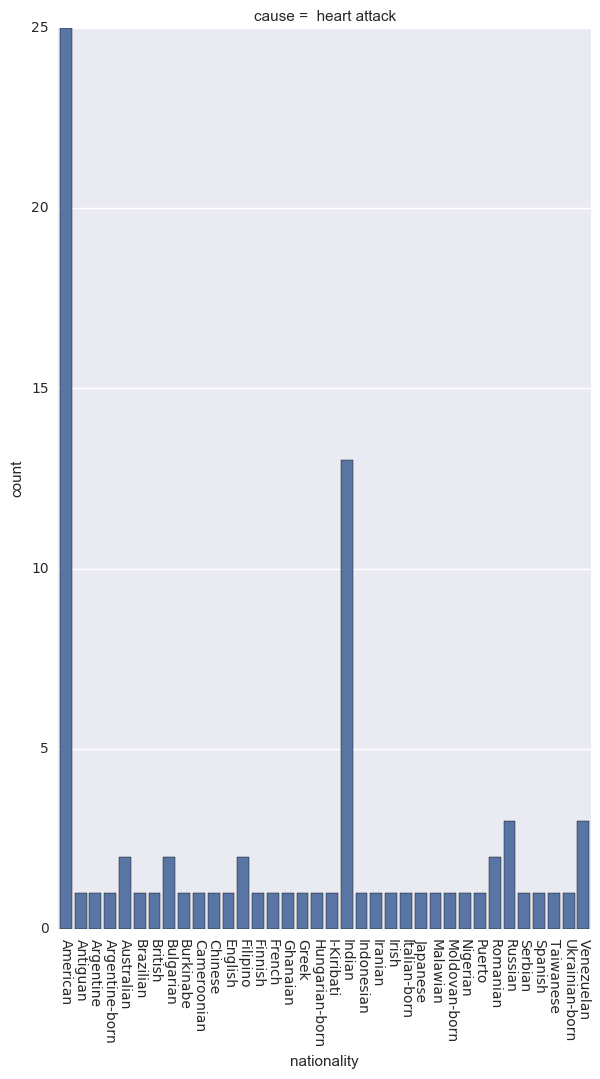

In [31]:

g1 = sns.FacetGrid(cancer3_heart, col="cause", size=10, aspect=.6, col_wrap=2)
g1 = g1.map(sns.barplot, "nationality", "count")
g1.set_xticklabels(rotation=-90)

**The above plot shows that when it comes to 'heart attack' among celebrities America takes the cake. But India is not far behing. I will now focus on America and analyze 'cancer' and 'heart attack' data a little more.**

In [32]:
Cancer_US=cancer[cancer['nationality']=="American"]

In [33]:
Cancer_US

,nationality,cause,count
3,American,brain cancer,15
4,American,breast cancer,4
5,American,cancer,60
10,American,liver cancer,4
11,American,lung cancer,17
12,American,pancreatic cancer,17


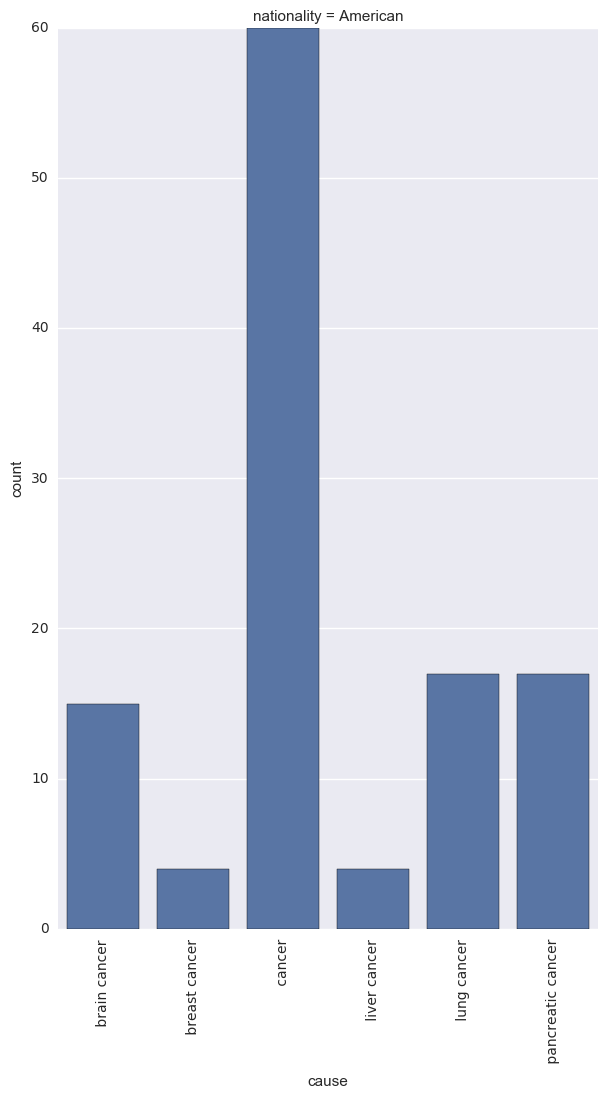

In [34]:
g = sns.FacetGrid(Cancer_US, col="nationality", size=10, aspect=.6, col_wrap=2)
g = g.map(sns.barplot, "cause", "count")
g.set_xticklabels(rotation=90)

**It is clear from the preceding plot that amnong cancer 'cancer' is the biggest cause of death among celebrities in America. So we take a close look at 'cancer' among celebrities in America over the years from 2006.**

In [35]:
cancer_all_US=payment[(payment['cause_of_death']==' cancer') & (payment['nationality']=='American')]

In [36]:
cancer_all_US

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
103,84,1932,cancer,May,2006,American tennis player winner at Wimbledon (19...,Ted Schroeder,American
216,65,1951,cancer,September,2006,American football player (Pittsburgh Steelers),Bill Saul,American
297,75,1941,cancer,October,2006,American football player (1955–1964),Don Burroughs,American
346,61,1955,cancer,November,2006,American film composer (Conan the Barbarian Ro...,Basil Poledouris,American
354,68,1948,cancer,November,2006,American cinematographer for Orson Welles (F f...,Gary Graver,American
414,71,1945,cancer,December,2006,American baseball player (Los Angeles Dodgers)...,Larry Sherry,American
524,74,1942,cancer,February,2007,American author (The Mephisto Waltz Ellis Island),Fred Mustard Stewart,American
534,81,1935,cancer,February,2007,American voice actor (Transformers Alvin and t...,Walker Edmiston,American
559,76,1940,cancer,March,2007,American basketball player (NC State) and busi...,Bobby Speight,American
656,68,1948,cancer,April,2007,American Democratic Representative (Calif.) Ch...,Juanita Millender-McDonald,American


In [37]:
count_yr=cancer_all_US.groupby(['cause_of_death','death_year','nationality']).size()

In [38]:
count_yr

cause_of_death  death_year  nationality
 cancer         2006        American        6
                2007        American       19
                2008        American       30
                2009        American       37
                2010        American       52
                2011        American       43
                2012        American       61
                2013        American       48
                2014        American       55
                2015        American       58
                2016        American       60
dtype: int64

In [39]:
cancer_US_yr= pd.DataFrame(data=dict(count_yr=count_yr)).reset_index()

In [40]:
cancer_US_yr

,cause_of_death,death_year,nationality,count_yr
0,cancer,2006,American,6
1,cancer,2007,American,19
2,cancer,2008,American,30
3,cancer,2009,American,37
4,cancer,2010,American,52
5,cancer,2011,American,43
6,cancer,2012,American,61
7,cancer,2013,American,48
8,cancer,2014,American,55
9,cancer,2015,American,58


In [41]:
list(cancer_US_yr.columns.values)

['cause_of_death', 'death_year', 'nationality', 'count_yr']

In [44]:

cancer_US_yr.columns=['cause_of_death','death_year','nationality','count_yr']

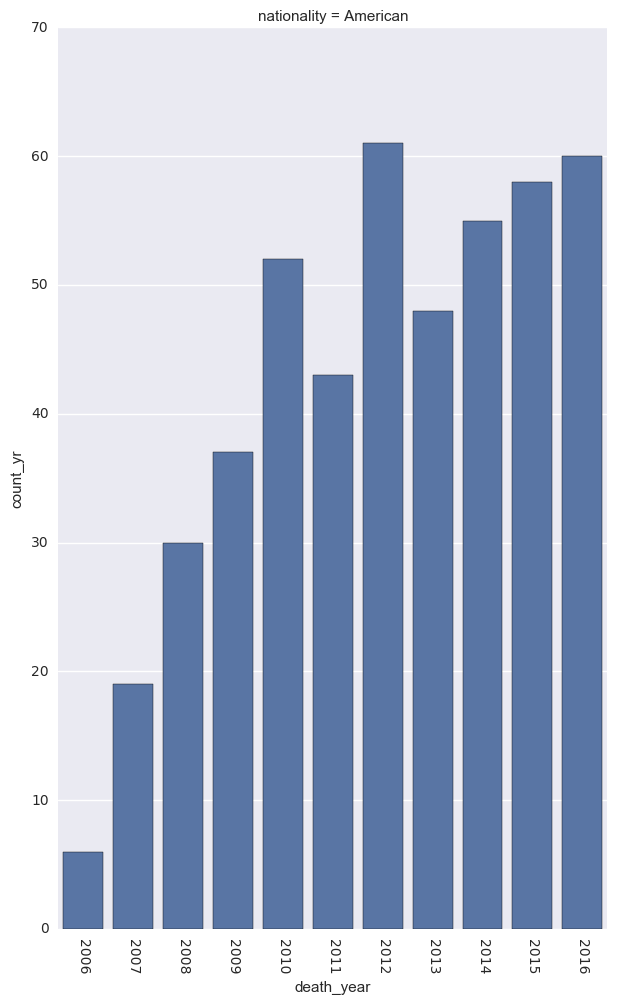

In [45]:
g2 = sns.FacetGrid(cancer_US_yr, col="nationality", size=10, aspect=.6, col_wrap=2)
g2 = g2.map(sns.barplot,'death_year','count_yr')
g2.set_xticklabels(rotation=-90)

**The preceding chart show how 'cancer' caused death rates have evolved over the years.It was increasing till 2010 and decreased a little in 2011,increased again in 2012 and decreased in 2013. From 2014 ithas been in steady rise. We will try to gain the same insight in the evolution of heart attack rates.**

In [46]:
heart_all_US=payment_nona[(payment_nona['cause_of_death']==' heart attack') & (payment_nona['nationality']=='American')]

In [47]:
count_heart_yr=heart_all_US.groupby(['cause_of_death','death_year','nationality']).size()

In [48]:
heart_US_yr= pd.DataFrame(data=dict(count_heart_yr=count_heart_yr)).reset_index()

In [49]:
heart_US_yr

,cause_of_death,death_year,nationality,count_heart_yr
0,heart attack,2006,American,8
1,heart attack,2007,American,15
2,heart attack,2008,American,30
3,heart attack,2009,American,36
4,heart attack,2010,American,42
5,heart attack,2011,American,20
6,heart attack,2012,American,37
7,heart attack,2013,American,33
8,heart attack,2014,American,33
9,heart attack,2015,American,34


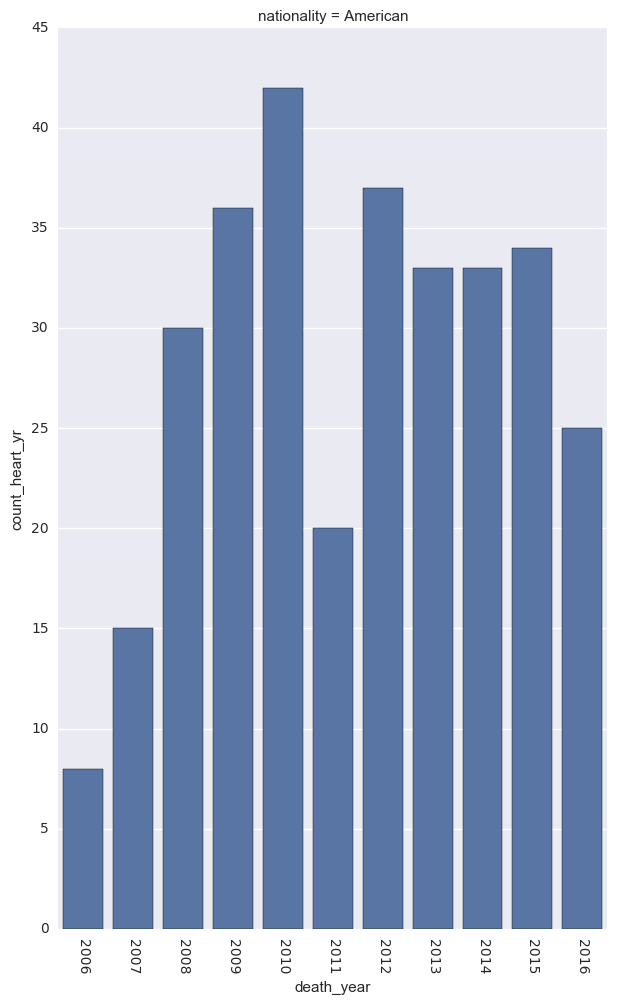

In [50]:
g2 = sns.FacetGrid(heart_US_yr, col="nationality", size=10, aspect=.6, col_wrap=2)
g2 = g2.map(sns.barplot,'death_year','count_heart_yr')
g2.set_xticklabels(rotation=-90)

** The heart attack rates are more interesting and follow no apparent steady pattern after 2010. In fact itreached its highest in 2010.There was a decrease in rates from 2015 to 2016.Next we will try to see overall what is the trend in America as far as death of celebrities go throughout the years from 20016-2016.**

In [51]:
disease_US=payment[payment['nationality']=='American']

In [52]:
disease_US = disease_US.dropna()

In [53]:
disease_US

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
0,85,1931,natural causes,January,2006,American businessman chairman of IBM (1973–1981),Frank Cary,American
1,49,1967,murdered,January,2006,American musician (House of Freaks Gutterball),Bryan Harvey,American
2,64,1952,Alzheimer's disease,January,2006,American baseball player (Oakland Athletics),Paul Lindblad,American
3,86,1930,Alzheimer's disease,January,2006,American politician Representative from Oregon...,Charles O. Porter,American
9,70,1946,lung cancer,January,2006,American actor (The Guiding Light),Don Stewart,American
13,85,1931,heart failure,January,2006,American actress (Lolita The Poseidon Adventure),Shelley Winters,American
23,38,1978,complications from drug abuse,January,2006,American punk rock singer (Rich Kids on LSD),Jason Sears,American
24,78,1938,U,February,2006,American politician,Ronald B. Cameron,American
26,82,1934,and radio host,February,2006,American actor (Grandpa Munster on The Munster...,Al Lewis,American
29,76,1940,murdered,February,2006,American TV writer director (Curious George an...,Alan Shalleck,American


In [54]:
count_US_all=disease_US.groupby(['death_year','nationality']).size()

In [55]:
count_US_all_data= pd.DataFrame(data=dict(count_US_all=count_US_all)).reset_index()

In [56]:
count_US_all_data

,death_year,nationality,count_US_all
0,2006,American,114
1,2007,American,191
2,2008,American,321
3,2009,American,385
4,2010,American,486
5,2011,American,389
6,2012,American,441
7,2013,American,471
8,2014,American,500
9,2015,American,437


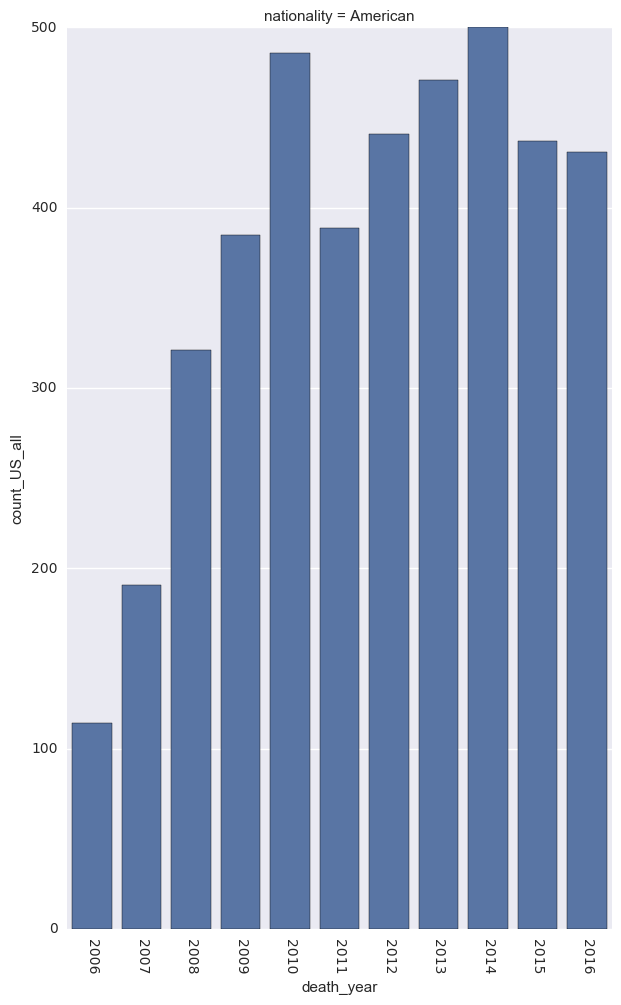

In [57]:
g4 = sns.FacetGrid(count_US_all_data, col="nationality", size=10, aspect=.6, col_wrap=2)
g4 = g4.map(sns.barplot,'death_year','count_US_all')
g4.set_xticklabels(rotation=-90)

**Over all no steady trend appears. But the good news is the trend in US overall from 2014 is that the mortality rates among celebrities in in decline.**

**Now let us see what kind of celebrities are most affected by 'cancer' and 'heart attack'.**

In [58]:
payment_nona_celebrity=payment_nona[((payment_nona['cause_of_death']==' cancer') | (payment_nona['cause_of_death']==' heart attack')) & (payment_nona['nationality']=='American')]

In [59]:
payment_nona_celebrity

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
56,76,1940,heart attack,March,2006,American country music star (Hee Haw),Buck Owens,American
103,84,1932,cancer,May,2006,American tennis player winner at Wimbledon (19...,Ted Schroeder,American
169,56,1960,heart attack,August,2006,American news anchor (CNN),Jay Young,American
188,66,1950,heart attack,September,2006,American wrestler and coach (Oklahoma State Un...,Tommy Chesbro,American
200,89,1927,heart attack,September,2006,American television journalist (NBC and CBS),Gordon Manning,American
216,65,1951,cancer,September,2006,American football player (Pittsburgh Steelers),Bill Saul,American
243,56,1960,heart attack,September,2006,American actor president of Actors' Equity Ass...,Patrick Quinn,American
297,75,1941,cancer,October,2006,American football player (1955–1964),Don Burroughs,American
313,85,1931,heart attack,October,2006,American writer (The Cay),Theodore Taylor,American
315,89,1927,heart attack,October,2006,American coach of the Boston Celtics (1950–1966),Red Auerbach,American


In [60]:
count_=payment_nona_celebrity.groupby(['cause_of_death','famous_for']).size()

In [61]:
count_writer=payment_nona_celebrity[payment_nona_celebrity['famous_for'].str.contains('writer | journalist')]

In [62]:
count_athelite=payment_nona_celebrity[payment_nona_celebrity['famous_for'].str.contains('player | football | Olympic')]

In [63]:
count_writer

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality
200,89,1927,heart attack,September,2006,American television journalist (NBC and CBS),Gordon Manning,American
313,85,1931,heart attack,October,2006,American writer (The Cay),Theodore Taylor,American
703,92,1924,heart attack,May,2007,American animation director animator and write...,Art Stevens,American
1101,68,1948,heart attack,November,2007,American actor and screenwriter (Beyond the Va...,Michael Blodgett,American
1443,79,1937,heart attack,February,2008,American scriptwriter (Bewitched),Richard Baer,American
1615,56,1960,cancer,April,2008,American television writer and producer (Nowhe...,Lawrence Hertzog,American
1718,61,1955,heart attack,May,2008,American science fiction and fantasy writer (M...,Robert Asprin,American
1953,80,1936,cancer,August,2008,American author (Unholy Wars) journalist and e...,John K. Cooley,American
2169,72,1944,cancer,October,2008,American journalist and reporter (New York Times),Paul L. Montgomery,American
2179,70,1946,heart attack,October,2008,American writer (The Aquarian Conspiracy),Marilyn Ferguson,American


In [64]:
count_nona_writer=count_writer.groupby(['cause_of_death','famous_for','nationality']).size()

In [65]:
count_US_celebrity= pd.DataFrame(data=dict(count_nona_writer=count_nona_writer)).reset_index()

In [66]:
count_US_celebrity

,cause_of_death,famous_for,nationality,count_nona_writer
0,cancer,American academic scientific skeptic and write...,American,1
1,cancer,American actress (The Man from U.N.C.L.E.) and...,American,1
2,cancer,American author (Unholy Wars) journalist and e...,American,1
3,cancer,American comedy writer (M*A*S*H) and blogger (...,American,1
4,cancer,American film (Big Momma's House Surf's Up Rio...,American,1
5,cancer,"American folk singer-songwriter (""Desperados W...",American,1
6,cancer,American journalist (Associated Press),American,1
7,cancer,American journalist and publisher (Tribune Pub...,American,1
8,cancer,American journalist and reporter (New York Times),American,1
9,cancer,American screenwriter (James Bond Superman),American,1


***Ths above analysis shows that writers and player/athelites are mostly affected by 'cancer' and 'heart attack'. We will see below that athelites are more affected than writers.

In [67]:
count_US_celebrity.groupby(['cause_of_death']).size()

cause_of_death
 cancer          21
 heart attack    38
dtype: int64

In [68]:
payment_nona_celebrity.groupby(['cause_of_death']).size()

cause_of_death
 cancer          469
 heart attack    313
dtype: int64

In [71]:
cancer_writer=21/float(469)
caner_per_writer=cancer_writer*100#percentage of writers and journalists in America affected by cancer
caner_per_writer

4.477611940298507

In [73]:
heartattack_per_writer=(38/float(313))*100 #percentage of writers and journalists in America affected by heartattack.
heartattack_per_writer

12.140575079872203

In [74]:
count_nona_athelite=count_athelite.groupby(['cause_of_death','famous_for','nationality']).size()
count_US_celebrity_ath= pd.DataFrame(data=dict(count_nona_athelite=count_nona_athelite)).reset_index()

In [75]:
count_US_celebrity_ath

,cause_of_death,famous_for,nationality,count_nona_athelite
0,cancer,American CFL football player (Toronto Argonauts),American,1
1,cancer,American Hall of Fame basketball player and co...,American,1
2,cancer,American Hall of Fame football player (Detroit...,American,1
3,cancer,American Olympic gold medal-winning (1948) rower,American,1
4,cancer,American Olympic gold medal-winning (1960) swi...,American,1
5,cancer,American Olympic luger (1980 1984 1988),American,1
6,cancer,American Olympic swimmer gold and silver medal...,American,1
7,cancer,American Olympic track athlete (1952 Summer Ol...,American,1
8,cancer,American baseball player (Atlanta Braves Cleve...,American,1
9,cancer,American baseball player (Baltimore Orioles),American,1


In [76]:
count_US_celebrity_ath.groupby(['cause_of_death']).size()

cause_of_death
 cancer          85
 heart attack    75
dtype: int64

In [79]:
cancer_athl_per=(85/float(469))*100 #percentage of athelites in America affected by cancer
cancer_athl_per

18.123667377398718

In [80]:
heartattck_athl_per=(75/float(313))*100 #percentage of athelites in America affected by heart attack.
heartattck_athl_per

23.961661341853034